In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

In [17]:
Housing_df = pd.read_csv(r"C:\Reinforcement Project - Python\Reinforcement Project - Python\Housing Dataset\housing.csv")

### Read the Housing Dataset

In [18]:
# Display First 5 records of the Housing-dataset

Housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Shape of the Dataset (Rows,Columns)

In [19]:
Housing_df.shape

(4600, 18)

In [21]:
Housing_df = pd.read_csv(r"C:\Reinforcement Project - Python\Reinforcement Project - Python\Housing Dataset\housing.csv",low_memory=False, dtype='unicode')
Housing_df = Housing_df.copy()

Basic information of the Dataset

In [14]:
Housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


### Null Values

In [22]:
# Number of missing values in each column

Housing_df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [23]:
Housing_df.isnull().sum().sum()

np.int64(134)

In [24]:
round(100*(Housing_df.isnull().sum()/len(Housing_df.index)), 2).sort_values(ascending=False)

city             1.24
sqft_living      0.87
yr_built         0.50
sqft_lot         0.30
price            0.00
date             0.00
floors           0.00
waterfront       0.00
bathrooms        0.00
bedrooms         0.00
condition        0.00
view             0.00
sqft_basement    0.00
sqft_above       0.00
yr_renovated     0.00
street           0.00
statezip         0.00
country          0.00
dtype: float64

In [27]:
# Fill numeric columns with median

Housing_df['sqft_living'] = Housing_df['sqft_living'].fillna(Housing_df['sqft_living'].median())
Housing_df['yr_built'] = Housing_df['yr_built'].fillna(Housing_df['yr_built'].median())
Housing_df['sqft_lot'] = Housing_df['sqft_lot'].fillna(Housing_df['sqft_lot'].median())

In [26]:
# Convert numeric columns from object to proper numeric types

numeric_cols = ['sqft_living', 'yr_built', 'sqft_lot']
for col in numeric_cols:
    Housing_df[col] = pd.to_numeric(Housing_df[col], errors='coerce')  # convert strings to numbers

In [63]:
# Fill missing values in the 'city' column with 'Unknown'

Housing_df['city'] = Housing_df['city'].fillna('Unknown')

In [64]:
# Display missing values after

print("\nMissing values after:\n", Housing_df.isnull().sum())


Missing values after:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
country          0
state            0
zip              0
dtype: int64


### Standardizing Values

In [3]:
# Information about the dataframe loan_df

Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [30]:
# Convert 'yr_built' from float to int

Housing_df['yr_built'] = Housing_df['yr_built'].astype(float)

In [31]:
# Convert object columns to numeric
Housing_df['waterfront'] = pd.to_numeric(Housing_df['waterfront'], errors='coerce')
Housing_df['view'] = pd.to_numeric(Housing_df['view'], errors='coerce')
Housing_df['condition'] = pd.to_numeric(Housing_df['condition'], errors='coerce')

In [32]:
# Convert date
Housing_df['date'] = pd.to_datetime(Housing_df['date'], dayfirst=True)

# Convert to numeric where needed
cols_to_numeric = ['price', 'bedrooms', 'bathrooms', 'sqft_above', 
                   'sqft_basement', 'yr_renovated']
for col in cols_to_numeric:
    Housing_df[col] = pd.to_numeric(Housing_df[col], errors='coerce')

# Convert yr_built to int:
Housing_df['yr_built'] = Housing_df['yr_built'].astype(int)

In [60]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4551 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4551 non-null   datetime64[ns]
 1   price          4551 non-null   float64       
 2   bedrooms       4551 non-null   int64         
 3   bathrooms      4551 non-null   float64       
 4   sqft_living    4551 non-null   float64       
 5   sqft_lot       4551 non-null   float64       
 6   floors         4551 non-null   float64       
 7   waterfront     4551 non-null   int64         
 8   view           4551 non-null   int64         
 9   condition      4551 non-null   int64         
 10  sqft_above     4551 non-null   int64         
 11  sqft_basement  4551 non-null   int64         
 12  yr_built       4551 non-null   int64         
 13  yr_renovated   4551 non-null   int64         
 14  street         4551 non-null   object        
 15  city           4551 non-nu

In [17]:
print(Housing_df['date'])

0      2014-05-02
1      2014-05-02
2      2014-05-02
3      2014-05-02
4      2014-05-02
          ...    
4595   2014-07-09
4596   2014-07-09
4597   2014-07-09
4598   2014-07-10
4599   2014-07-10
Name: date, Length: 4600, dtype: datetime64[ns]


In [33]:
# Round off float values to 2 decimal places

float_cols = Housing_df.select_dtypes(include=['float'])
Housing_df[float_cols.columns] = Housing_df[float_cols.columns].round(2)

### Fixing invalid values

In [34]:
# Unique values of each columns in the dataframe

Housing_df.apply(lambda x : x.unique())

date             [2014-05-02 00:00:00, 2014-05-03 00:00:00, 201...
price            [313000.0, 2384000.0, 342000.0, 420000.0, 5500...
bedrooms                            [3, 5, 4, 2, 6, 7, 9, 1, 8, 0]
bathrooms        [1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3....
sqft_living      [1340.0, 3650.0, 1930.0, 2000.0, 1940.0, 880.0...
sqft_lot         [7683.5, 9480.0, 9720.0, 6700.0, 7231.0, 15878...
floors                                    [1.5, 2, 1, 2.5, 3, 3.5]
waterfront                                                  [0, 1]
view                                               [0, 4, 1, 2, 3]
condition                                          [3, 5, 4, 2, 1]
sqft_above       [1340, 3370, 1930, 1000, 1140, 880, 1350, 2710...
sqft_basement    [0, 280, 1000, 800, 860, 1010, 360, 690, 470, ...
yr_built         [1955, 1921, 1966, 1963, 1976, 1938, 1989, 198...
yr_renovated     [2005, 0, 1992, 1994, 2010, 1988, 2009, 1969, ...
street           [18810 Densmore Ave N, 709 W Blaine St, 26206

In [35]:
# split state and zip into separate column's

Housing_df[['state', 'zip']] = Housing_df['statezip'].str.extract(r'([A-Z]+)\s+(\d+)', expand=True)
Housing_df.drop('statezip', axis=1, inplace=True)  # Drop combined column "statezip"

In [36]:
# After separation

Housing_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip
0,2014-05-02,313000.0,3,1.50,1340.0,7683.5,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133
1,2014-05-02,2384000.0,5,2.50,3650.0,7683.5,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119
2,2014-05-02,342000.0,3,2.00,1930.0,7683.5,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042
3,2014-05-02,420000.0,3,2.25,2000.0,7683.5,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008
4,2014-05-02,550000.0,4,2.50,1940.0,7683.5,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052


In [37]:
# Identify Columns with Mixed or Irregular Formatting

for street in Housing_df.columns:
    print(f"{street} unique types:", Housing_df[street].map(type).nunique())

date unique types: 1
price unique types: 1
bedrooms unique types: 1
bathrooms unique types: 1
sqft_living unique types: 1
sqft_lot unique types: 1
floors unique types: 1
waterfront unique types: 1
view unique types: 1
condition unique types: 1
sqft_above unique types: 1
sqft_basement unique types: 1
yr_built unique types: 1
yr_renovated unique types: 1
street unique types: 1
city unique types: 1
country unique types: 1
state unique types: 1
zip unique types: 1


Since all columns have only 1 unique data type, it means the dataset is free from mixed-type columns 

In [23]:
# Check for Irregular Text Formatting (Categorical Columns)

object_cols = Housing_df.select_dtypes(include='object').columns

for col in object_cols:
    print(f"\n{col} unique values:")
    print(Housing_df[col].value_counts(dropna=False))


floors unique values:
floors
1      2174
2      1811
1.5     444
3       128
2.5      41
3.5       2
Name: count, dtype: int64

street unique values:
street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
11716 16th Ave NE        2
35229 SE Terrace St      2
13800 453rd Ave SE       2
                        ..
501 N 143rd St           1
14855 SE 10th Pl         1
759 Ilwaco Pl NE         1
5148 S Creston St        1
8519 28th Ave NW         1
Name: count, Length: 4525, dtype: int64

city unique values:
city
Seattle                1612
Renton                  289
Bellevue                283
Redmond                 234
Kirkland                185
Kent                    183
Issaquah                183
Sammamish               173
Auburn                  173
Federal Way             146
Shoreline               121
Woodinville             113
Maple Valley             95
Mercer Island            86
Burien                   74
Snoqualmie               69
Kenmore                  66
Des

In [24]:
Housing_df = Housing_df[Housing_df['price'] > 0]

In [25]:
Housing_df['street_suffix'] = Housing_df['street'].str.extract(r'(\b[A-Za-z]+)$')
Housing_df['street_suffix'].value_counts()

street_suffix
St           1120
NE            774
SE            624
Pl            373
S             359
SW            355
NW            183
N             182
Ct             95
W              91
E              83
Way            81
Ave            66
Dr             43
Ln             36
Rd             35
Trail          12
Blvd            8
Cir             6
Northeast       5
South           4
Loop            3
Key             2
Terrace         2
Hwy             2
Crest           1
Esplanade       1
Court           1
Strasse         1
Promenade       1
Name: count, dtype: int64

In [26]:
# Get the number of rows

num_rows = Housing_df.shape[0]

print("Number of rows:", num_rows)

Number of rows: 4551


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### Check - Outliers

1- sqft_living 
2. sqft_lot 
3. sqft_above 
4. sqft_basement

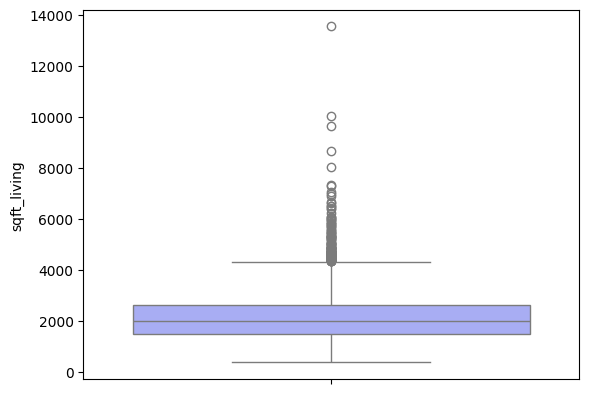

In [38]:
sns.boxplot(Housing_df['sqft_living'],color='#9ba2ff')
plt.show()

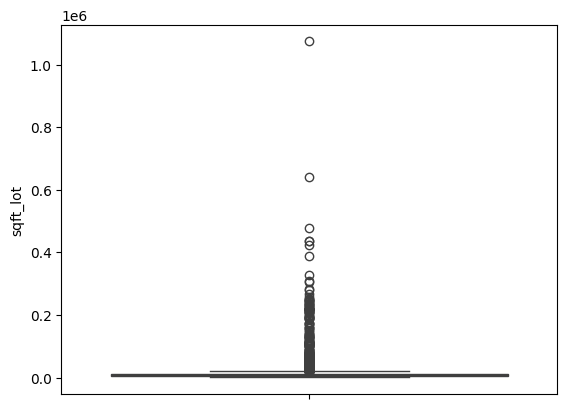

In [39]:
sns.boxplot(Housing_df["sqft_lot"])
plt.show()

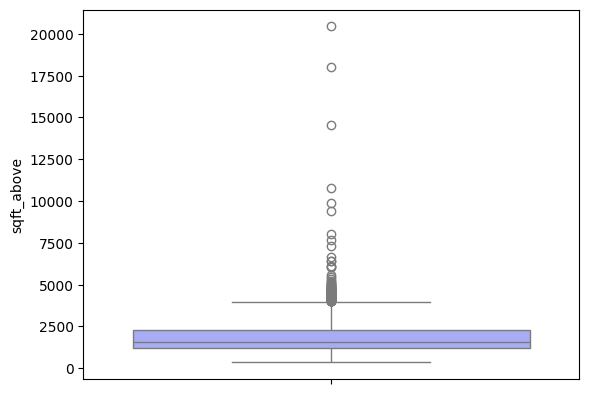

In [48]:
import seaborn as sns
sns.boxplot(Housing_df['sqft_above'],color='#9ba2ff')
plt.show()

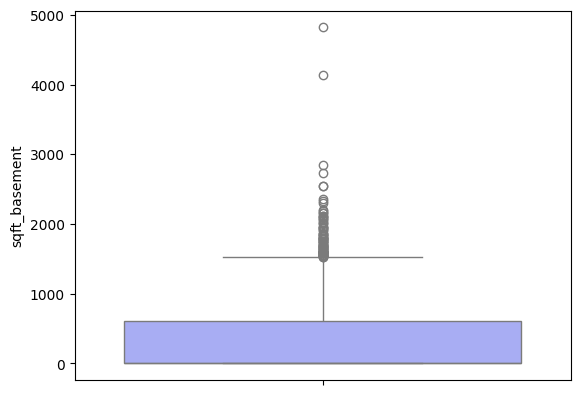

In [50]:
import seaborn as sns
sns.boxplot(Housing_df['sqft_basement'],color='#9ba2ff')
plt.show()

In [40]:
Housing_df["sqft_living"].median()

np.float64(1980.0)

In [49]:
Housing_df["sqft_above"].median()

np.float64(1590.0)

In [41]:
Housing_df["sqft_lot"].median()

np.float64(7683.5)

In [51]:
Housing_df["sqft_basement"].median()

np.float64(0.0)

In [46]:
Housing_df["floors"].median()

np.float64(1.5)

In [68]:
# Fill with median, since there is a oulier

Housing_df["sqft_living"]=Housing_df["sqft_living"].fillna(Housing_df["sqft_living"].median())

In [69]:
# Fill with median, since there is a oulier

Housing_df["sqft_lot"]=Housing_df["sqft_lot"].fillna(Housing_df["sqft_lot"].median())

In [78]:
# Fill with median, since there is a oulier

Housing_df["sqft_above"]=Housing_df["sqft_above"].fillna(Housing_df["sqft_above"].median())

In [77]:
# Fill with median, since there is a oulier

Housing_df["sqft_basement"]=Housing_df["sqft_basement"].fillna(Housing_df["sqft_basement"].median())

In [70]:
Housing_df.isnull().sum().sum()

np.int64(0)

In [71]:
# convert floor's column into numeric
Housing_df['floors'] = pd.to_numeric(Housing_df['floors'], errors='coerce')

In [72]:
# Fill with median, since there is a oulier

Housing_df["floors"]=Housing_df["floors"].fillna(Housing_df["floors"].median())

In [97]:
Housing_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,country,state,zip,street_suffix,log_price
0,2014-05-02,313000.00,3,1.50,1340.0,7683.5,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,USA,WA,98133,N,12.653962
1,2014-05-02,2384000.00,5,2.50,3650.0,7683.5,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,USA,WA,98119,St,14.684291
2,2014-05-02,342000.00,3,2.00,1930.0,7683.5,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,USA,WA,98042,SE,12.742569
3,2014-05-02,420000.00,3,2.25,2000.0,7683.5,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,USA,WA,98008,NE,12.948012
4,2014-05-02,550000.00,4,2.50,1940.0,7683.5,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,USA,WA,98052,NE,13.217675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.67,3,1.75,1510.0,6360.0,1.0,0,0,4,...,0,1976,1979,501 N 143rd St,Seattle,USA,WA,98133,St,12.638399
4596,2014-07-09,534333.33,3,2.50,1460.0,7573.0,2.0,0,0,3,...,0,1976,2009,14855 SE 10th Pl,Bellevue,USA,WA,98007,Pl,13.188777
4597,2014-07-09,416904.17,3,2.50,3010.0,7014.0,2.0,0,0,3,...,0,1976,0,759 Ilwaco Pl NE,Renton,USA,WA,98059,NE,12.940614
4598,2014-07-10,203400.00,4,2.00,2090.0,6630.0,1.0,0,0,3,...,1020,1976,0,5148 S Creston St,Seattle,USA,WA,98178,St,12.222935


## Univariate Analysis

In [52]:
Housing_df[['price', 'sqft_living', 'bedrooms', 'bathrooms']].describe().round(2)

,price,sqft_living,bedrooms,bathrooms
count,4600.00,4600.00,4600.00,4600.00
mean,553948.31,2137.55,3.40,2.16
std,580837.14,960.92,0.91,0.78
min,0.00,370.00,0.00,0.00
25%,322500.00,1470.00,3.00,1.75
50%,461000.00,1980.00,3.00,2.25
75%,655000.00,2610.00,4.00,2.50
max,26590000.00,13540.00,9.00,8.00


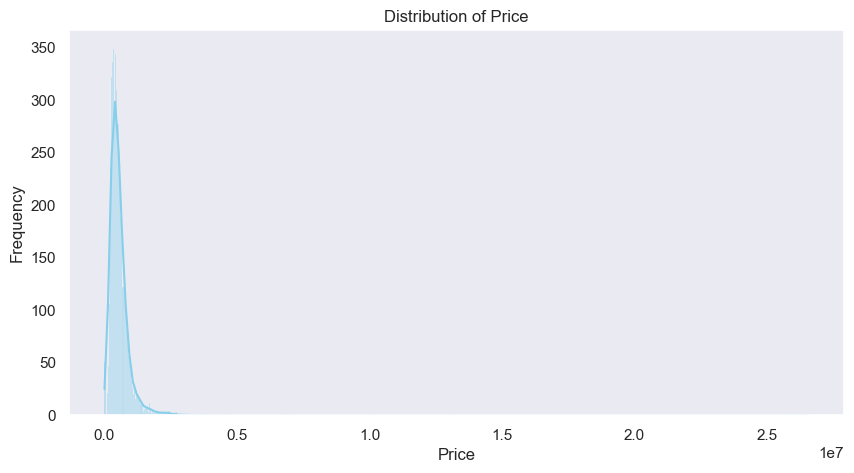

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="dark")

# Price distribution
plt.figure(figsize=(10, 5))
sns.histplot(Housing_df['price'], kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Price - positiviely skewed-----
Most houses --- Price at lowet end --affordable
****Few luxury prop - dominate high end

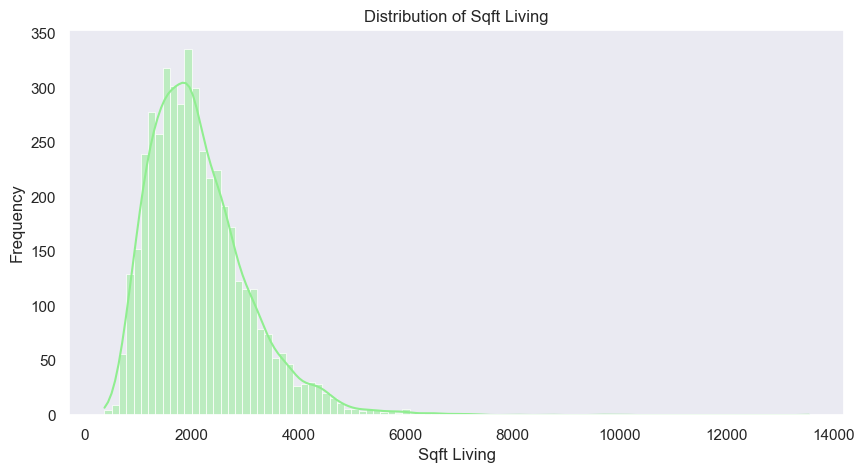

In [87]:
# Square footage
plt.figure(figsize=(10, 5))
sns.histplot(Housing_df['sqft_living'], kde=True, color='lightgreen')
plt.title('Distribution of Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Frequency')
plt.show()

- ###### Mostly around - 1500 to 2500 - Freq. higher
- ###### Entry level - 1000-3000
- ###### luxury\Estate - 5000 +

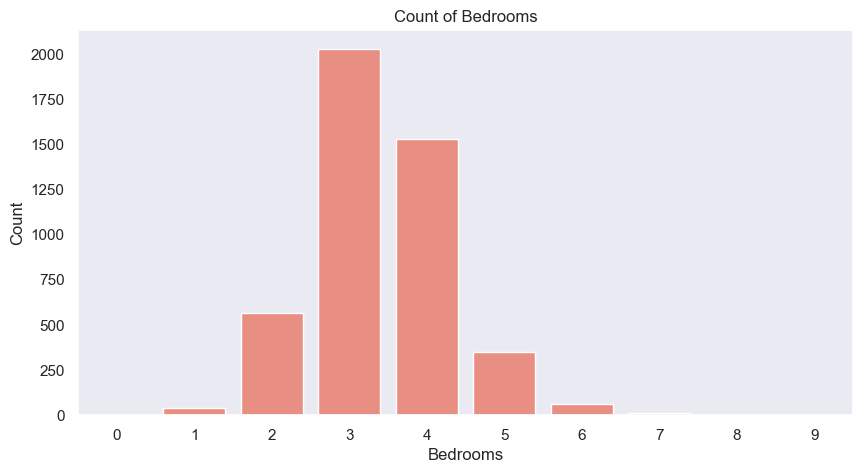

In [88]:
# Bedrooms
plt.figure(figsize=(10, 5))
sns.countplot(x='bedrooms', data=Housing_df, color='salmon')
plt.title('Count of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

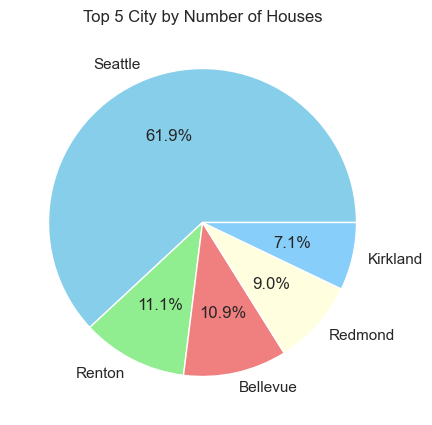

In [91]:
# Top 5 City by Number of Houses

top_locations = Housing_df['city'].value_counts().head(5)

top_locations.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(10, 5),
    colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightskyblue']
)
plt.title("Top 5 City by Number of Houses")
plt.ylabel("")  # Hides the y-label
plt.show()

## Bi-Variate Analysis

1.Price vs Sqft

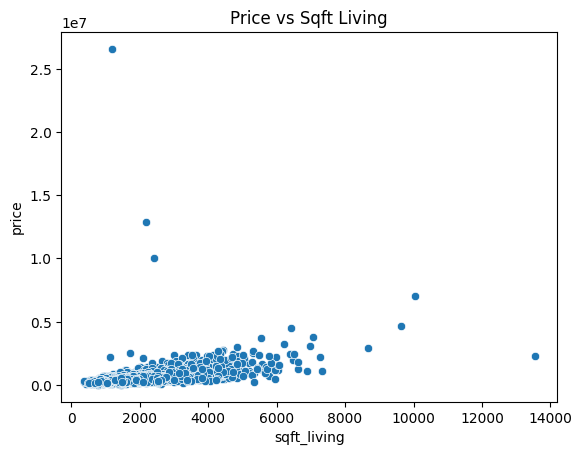

In [48]:
import seaborn as sns

sns.scatterplot(x='sqft_living', y='price', data=Housing_df)
plt.title("Price vs Sqft Living")
plt.show()

-  Positive Trend - As sqft increase, price to increases
-  Most home - 1000 to 4000sqft under 1million

2. Price vs Year Built

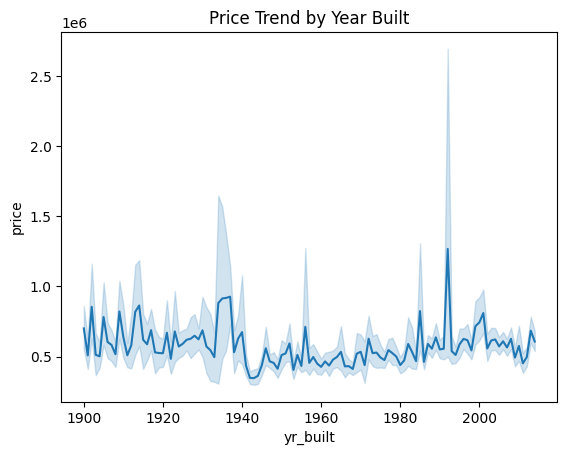

In [49]:
sns.lineplot(x='yr_built', y='price', data=Housing_df)
plt.title("Price Trend by Year Built")
plt.show()

Due to modern features or higher construction cost

 3 Price vs Sqft Above & Sqft Basement

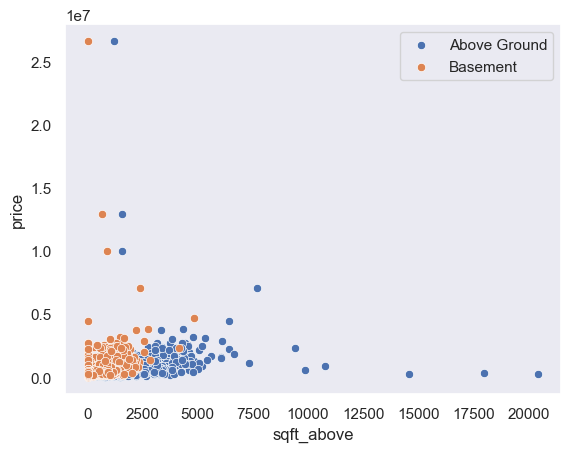

In [45]:
sns.scatterplot(data= Housing_df, x='sqft_above', y='price', label='Above Ground')
sns.scatterplot(data= Housing_df, x='sqft_basement', y='price', label='Basement')
plt.legend()

-  Most house are clustered below 5000sqft
-  Range - between 2M

#### Aditional

4 Price vs Area

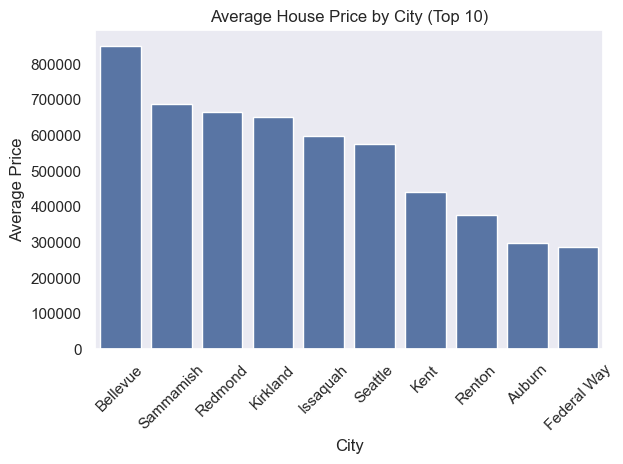

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average price per city
avg_price_per_city = filtered_df.groupby('city')['price'].mean().sort_values(ascending=False)

# Plot
sns.barplot(x=avg_price_per_city.index, y=avg_price_per_city.values)
plt.title('Average House Price by City (Top 10)')
plt.ylabel('Average Price')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Price vs View

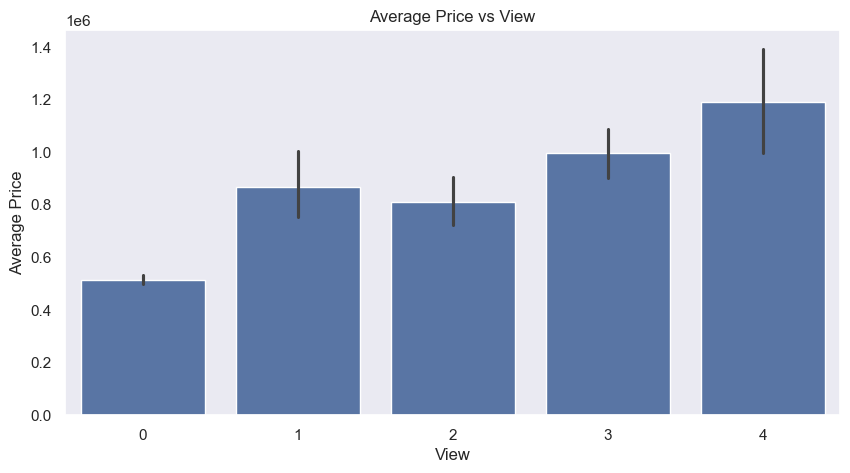

In [104]:
# Plotting the average price for each view category

plt.figure(figsize=(10, 5))
sns.barplot(data=Housing_df, x='view', y='price', estimator='mean')
plt.title("Average Price vs View")
plt.xlabel("View")
plt.ylabel("Average Price")
plt.show()

## Multivariate Analysis

1. Correlation Matrix (Numerical Variables)

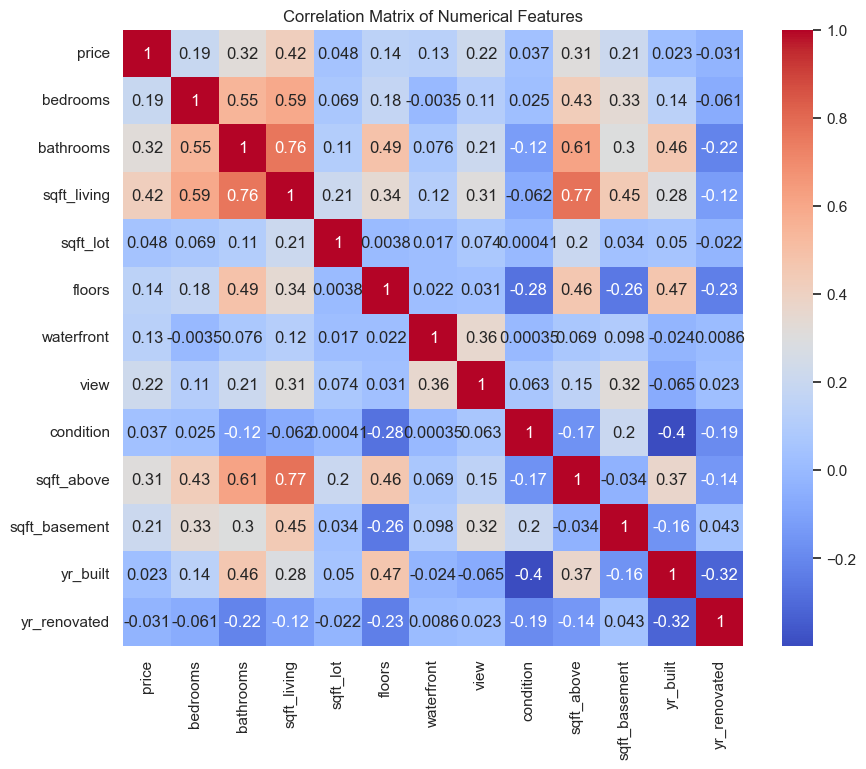

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only numerical columns
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
            'floors', 'waterfront', 'view', 'condition', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated']

# Compute correlation matrix
corr_matrix = Housing_df[num_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#####  Strong Positive Correlations:
- **sqft_living vs bathrooms and sqft_above**:
-   Larger homes tend to have more bathrooms and more above-ground space.
##### Weak/No Correlation with Price:
- **sqft_lot, condition, yr_built**:
-   These features have very weak or negligible correlation with price in this dataset.

#### Correlation Insights
- **Strong Positives:** `sqft_living` vs `bathrooms`, `sqft_above` → Larger homes → more bathrooms/above-ground space.  
- **Weak with Price:** `sqft_lot`, `condition`, `yr_built` → Minimal impact on price.  
- **Moderate with Price:** `bathrooms`, `sqft_living`, `sqft_above`, `view` → Some influence on price.

Pairplot or Scatter Matrix

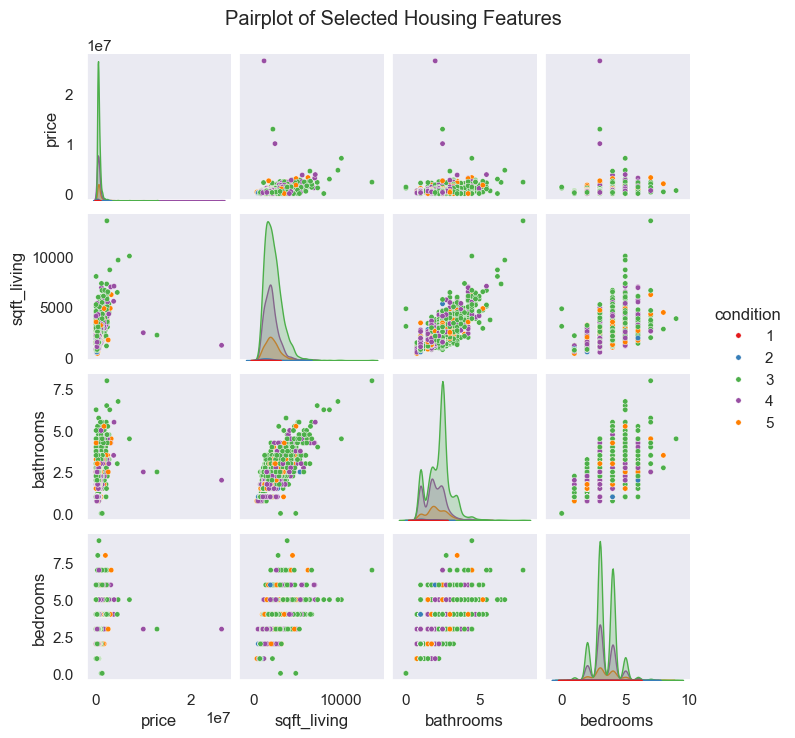

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    Housing_df[['price', 'sqft_living', 'bathrooms', 'bedrooms', 'condition']],
    diag_kind='kde',
    hue='condition',
    palette='Set1',
    height=1.8,
    plot_kws={'s': 15}
)
plt.suptitle("Pairplot of Selected Housing Features", y=1.02)
plt.show()

### Feature Engineering

 Age of the Property

In [112]:
Housing_df['age'] = 2025 - Housing_df['yr_built']

Was the House Renovated

In [113]:
Housing_df['was_renovated'] = Housing_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

Price per Square Foot

In [114]:
Housing_df['price_per_sqft'] = Housing_df['price'] / Housing_df['sqft_living']

 Total Square Footage (Living + Basement)

In [115]:
Housing_df['total_sqft'] = Housing_df['sqft_living'] + Housing_df['sqft_basement']

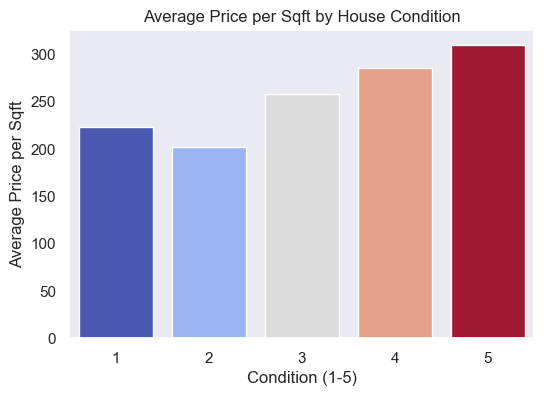

In [103]:
plt.figure(figsize=(6, 4))
avg_price = Housing_df.groupby('condition')['price_per_sqft'].mean().reset_index()
sns.barplot(x='condition', y='price_per_sqft', data=avg_price, hue='condition', palette='coolwarm', legend=False)

plt.title('Average Price per Sqft by House Condition')
plt.xlabel('Condition (1-5)')
plt.ylabel('Average Price per Sqft')
plt.show()

 Avg Price per Sqft by Renovation and Waterfront

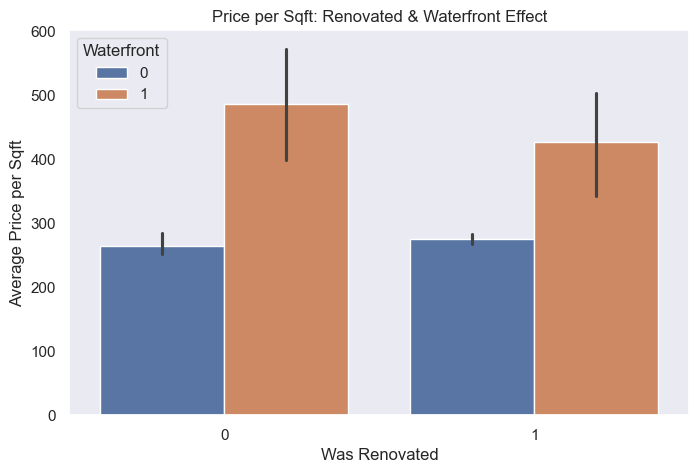

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(x='was_renovated', y='price_per_sqft', hue='waterfront', data=Housing_df)
plt.title('Price per Sqft: Renovated & Waterfront Effect')
plt.xlabel('Was Renovated')
plt.ylabel('Average Price per Sqft')
plt.legend(title='Waterfront')
plt.show()

#### Additional

Price vs. Price per Sqft (with regression line)

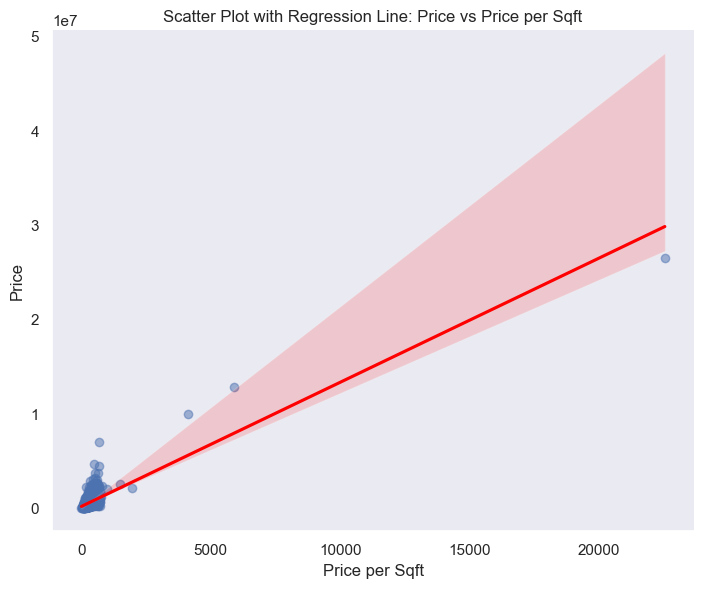

In [94]:
sns.lmplot(data=Housing_df, x='price_per_sqft', y='price', height=6, aspect=1.2, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: Price vs Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Price')
plt.show()

### Hypothesis Testing

In [105]:
# Do waterfront properties have higher prices than non-waterfront

from scipy.stats import ttest_ind

waterfront_prices = Housing_df[Housing_df['waterfront'] == 1]['price']
non_waterfront_prices = Housing_df[Housing_df['waterfront'] == 0]['price']

t_stat, p_val = ttest_ind(waterfront_prices, non_waterfront_prices, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.5f}")

T-statistic: 4.04, P-value: 0.00036


Reject - null hypothesis
Waterfall property - high price than non-waterfall prop

In [108]:
# Does renovation affect price per sqft

renovated = Housing_df[Housing_df['was_renovated'] == 1]['price_per_sqft']
not_renovated = Housing_df[Housing_df['was_renovated'] == 0]['price_per_sqft']

t_stat, p_val = ttest_ind(renovated, not_renovated, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.5f}")

T-statistic: 1.09, P-value: 0.27760


Fail to reject - No enough evidence of an affect

In [109]:
# Is there a relationship between number of bedrooms and price?

renovated = Housing_df[Housing_df['was_renovated'] == 1]['price_per_sqft']
not_renovated = Housing_df[Housing_df['was_renovated'] == 0]['price_per_sqft']

t_stat, p_val = ttest_ind(renovated, not_renovated, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.5f}")


T-statistic: 1.09, P-value: 0.27760
